<a href="https://colab.research.google.com/github/mohiteprathamesh1996/bank_term_deposit_marketing_analysis/blob/main/h2o_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
from google.colab import files

uploaded = files.upload()

xls = pd.ExcelFile("bank_term_deposit_marketing_analysis.xlsx")

xls.sheet_names

Saving bank_term_deposit_marketing_analysis.xlsx to bank_term_deposit_marketing_analysis (1).xlsx


['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [3]:
client_info = pd.read_excel("bank_term_deposit_marketing_analysis.xlsx",
                            "CLIENT_INFO")

loan_history = pd.read_excel("bank_term_deposit_marketing_analysis.xlsx",
                             "LOAN_HISTORY")

marketing_history = pd.read_excel("bank_term_deposit_marketing_analysis.xlsx",
                                  "MARKETING HISTORY")

subscription_history = pd.read_excel("bank_term_deposit_marketing_analysis.xlsx",
                                     "SUBSCRIPTION HISTORY")

In [4]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [5]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [6]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [7]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [8]:
df = pd.merge(pd.merge(pd.merge(client_info, 
                                loan_history,
                                on=["ID"],
                                how="left"), 
                       marketing_history,
                       on=["ID"],
                       how="left"), 
              subscription_history,
              on=["ID"],
              how="left")

df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.drop(columns=["ID"], inplace=True)

### Task 4: Data Prep & Start H2O

In [12]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size="10G")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 mins 44 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,13 hours and 58 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_noxted
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [15]:
train, test = h2o_df.split_frame(ratios=[0.75])

x = train.columns
y = "TERM_DEPOSIT"

x.remove(y)

### Task 5: Run H2O AutoML

In [18]:
aml = H2OAutoML(max_runtime_secs=300, 
                balance_classes=True, 
                project_name="Final")

aml.train(x=x, y=y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [20]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210202_033846,0.933053,0.214687,0.620578,0.166646,0.253656,0.0643414
XGBoost_grid__1_AutoML_20210202_033846_model_1,0.930713,0.203906,0.613604,0.162954,0.25279,0.0639027
XGBoost_grid__1_AutoML_20210202_033846_model_2,0.930464,0.205581,0.607677,0.17902,0.254164,0.0645991
GBM_grid__1_AutoML_20210202_033846_model_1,0.93042,0.215992,0.604424,0.165186,0.261172,0.0682109
StackedEnsemble_AllModels_AutoML_20210202_033846,0.928803,0.208766,0.619235,0.174135,0.251837,0.063422
XGBoost_3_AutoML_20210202_033846,0.918058,0.223123,0.592589,0.186652,0.257824,0.0664734
GBM_3_AutoML_20210202_033846,0.917973,0.285882,0.56977,0.185644,0.295249,0.0871721
GBM_5_AutoML_20210202_033846,0.917476,0.300645,0.568461,0.181654,0.301024,0.0906157
XGBoost_2_AutoML_20210202_033846,0.916153,0.248917,0.592905,0.182574,0.263225,0.0692876
GBM_2_AutoML_20210202_033846,0.907036,0.303563,0.54681,0.180168,0.301562,0.0909394


### Task 7: Base Learner XGBoost Model Exploration

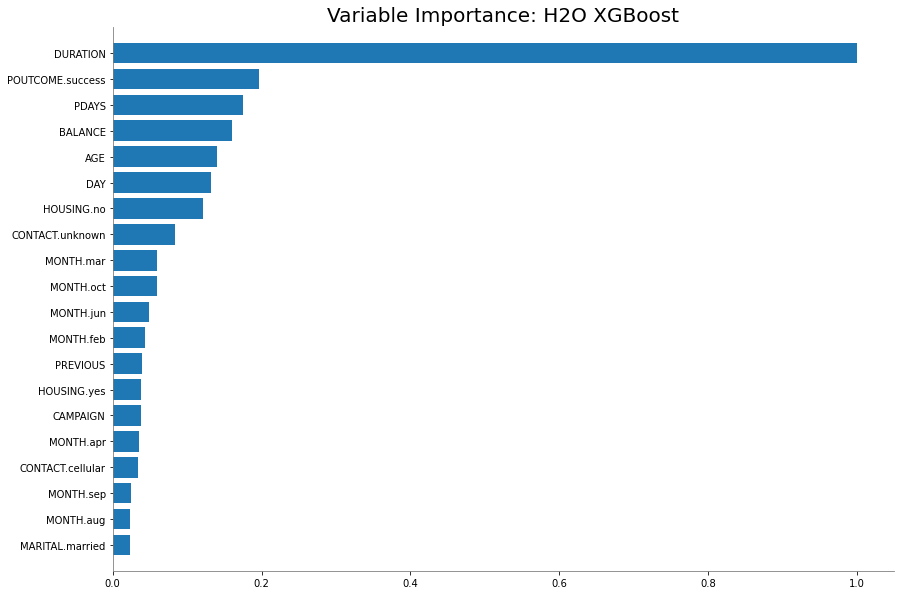

In [37]:
model = h2o.get_model("XGBoost_grid__1_AutoML_20210202_033846_model_1")

model.varimp_plot(num_of_features=20)